In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

# 視覺化函式庫
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習函式庫
import sklearn


import requests, zipfile
import io

# 顯示到小數點後第3位
%precision 3

'%.3f'

In [29]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res = requests.get(url).content

# 將取得的資料作為DataFrame物件讀取
mushroom = pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)

# 在資料的行裡設置標籤
mushroom.columns = ['classes','cap_shape','cap_surface','cap_color','odor','bruises',
                    'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                    'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                    'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                    'ring_number','ring_type','spore_print_color','population','habitat']

# 顯示資料開頭5列
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
print('資料的形式：{}'.format(mushroom.shape))
print('遺漏的數量：{}'.format(mushroom.isnull().sum().sum()))

資料的形式：(8124, 23)
遺漏的數量：0


#### 8-5-2 資料的整理

In [31]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
# 也將目標變數旗標化(0/1化)
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x:1 if x == 'p' else 0)

#### 8-5-3 熵：不純度的指標

In [10]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [12]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [13]:
-(.5 * np.log2(.5) + .5 * np.log2(.5))

1.000

In [14]:
-(.001 * np.log2(.001) + .999 * np.log2(.999))

0.011

In [15]:
# 由於種類是2分類，關係式為 p1 = 1 - p2
def calc_entropy(p):
    return -(p * np.log2(p) + (1 - p) * np.log2(1 - p))

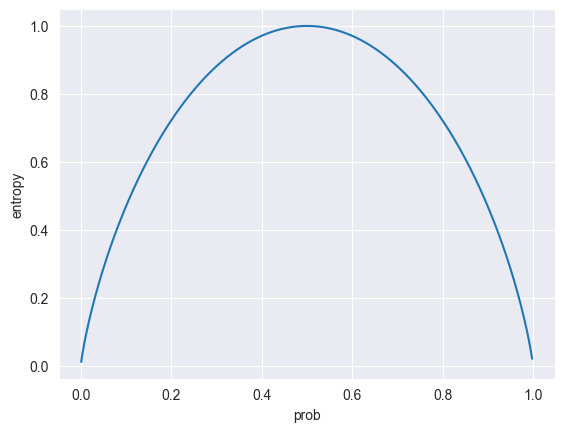

In [16]:
# 讓p之值從0.001到0.999之間以0.001的刻度移動
p = np.arange(.001,.999,.001)

# 圖形化
plt.plot(p,calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [17]:
mushroom_dummy.groupby('flg')['flg'].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

In [18]:
entropy_init = calc_entropy(.518)
print('毒菇資料的熵之初始值：{:.3f}'.format(entropy_init))

毒菇資料的熵之初始值：0.999


越接近1表示越是無法適別的狀態

#### 8-5-4 資訊獲利：測量分期條件的有用性

In [20]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [21]:
# cap_color不為c時的熵
p1 = 4176 / (4176 + 3904)
p2 = 1 - p1
entropy_c0 = -(p1 * np.log2(p1) + p2 * np.log2(p2))
print('entropy_c0:{:.3f}'.format(entropy_c0))

entropy_c0:0.999


In [22]:
# cap_color為c時的熵
p1 = 32 / (32 + 12)
p2 = 1 - p1
entropy_c1 = -(p1 * np.log2(p1) + p2 * np.log2(p2))
print('entropy_c1:{:.3f}'.format(entropy_c1))

entropy_c1:0.845


In [23]:
entropy_after = (4176 + 3904) / 8124 * entropy_c0 + (32 + 12) / 8124 * entropy_c1
print('資料分割的平均熵:{:.3f}'.format(entropy_after))

資料分割的平均熵:0.998


In [24]:
print('以變數cap_color進行分割所得的資訊獲利:{:.3f}'.format(entropy_init - entropy_after))

以變數cap_color進行分割所得的資訊獲利:0.001


In [25]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [26]:
# gill_color不為b時的熵
p1 = 4208 / (4208 + 2188)
p2 = 1 - p1
entropy_b0 = -(p1 * np.log2(p1) + p2 * np.log2(p2))

# gill_color為b時的熵
p1 = 0 / (0 + 1728)
p2 = 1 - p1
entropy_b1 = -( p2 * np.log2(p2)) # 由於沒有flg變數為0的樣本，故不包含p1項

entropy_after = (4208 + 2188) / 8124 * entropy_b0 + (0 + 1728) / 8124 * entropy_b1
print('以變數gill_color進行分割所得的資訊獲利:{:.3f}'.format(entropy_init - entropy_after))

以變數gill_color進行分割所得的資訊獲利:0.269


決策樹：以資訊獲利最大的分歧條件來分割資料，接著對分割後的資料同樣以資料獲利最大的分歧條件來進行探索。
- 能接受越多分歧，便是越複雜的模型。

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 設定X與y
X = mushroom_dummy.drop('flg', axis = 1)
y = mushroom_dummy['flg']

# 分為訓練資料與測試資料
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 決策樹類別的初始化與學習
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 0)
# criterion = 'entropy' 分歧條件指定為熵
# max_depth 為分歧的數量
model.fit(X_train,y_train)

print('準確度（train）:{:.3f}'.format(model.score(X_train,y_train)))
print('準確度（test）:{:.3f}'.format(model.score(X_test,y_test)))

準確度（train）:0.883
準確度（test）:0.894


In [37]:
# 參考程式
# 需要安裝pydotplus與graphviz
from sklearn import tree
import pydotplus
from six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file = dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png)

FileNotFoundError: No such file or directory: '<function Dot.__init__.<locals>.<lambda> at 0x7f9b017d7940>'

FileNotFoundError: No such file or directory: '<function Dot.__init__.<locals>.<lambda> at 0x7f9b017d7940>'

<IPython.core.display.Image object>

#### 練習問題8-5

In [47]:
# 為了資料分割（訓練資料與測試資料）的匯入
from sklearn.model_selection import train_test_split

# 邏輯迴歸模型建構的匯入
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

# 分為訓練資料與測試資料
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = .5, random_state = 0) # test_size = .5 為將資料分為一半、random_state將亂數固定


models = {
    'tree_entropy1': DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state = 0),
    'tree_entropy2': DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 0),
    'tree_entropy3': DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0),
    'tree_entropy4': DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 0),
    'tree_entropy5': DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 0),
    'tree_entropy6': DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, random_state = 0),
    'tree_gini1': DecisionTreeClassifier(criterion = 'gini', max_depth = 1, random_state = 0),
    'tree_gini2': DecisionTreeClassifier(criterion = 'gini', max_depth = 2, random_state = 0),
    'tree_gini3': DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0),
    'tree_gini4': DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 0),
    'tree_gini5': DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 0),
    'tree_gini6': DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state = 0),
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name,'train')] = model.score(X_train,y_train)
    scores[(model_name,'test')] = model.score(X_test,y_test)

pd.Series(scores).unstack()

,test,train
tree_entropy1,0.894737,0.929577
tree_entropy2,0.894737,0.929577
tree_entropy3,0.936842,0.978873
tree_entropy4,0.929825,0.992958
tree_entropy5,0.940351,1.000000
tree_entropy6,0.940351,1.000000
tree_gini1,0.905263,0.933099
tree_gini2,0.926316,0.961268
tree_gini3,0.926316,0.961268
tree_gini4,0.926316,0.982394
